C:\Users\hp\anaconda3\envs\dlc_py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


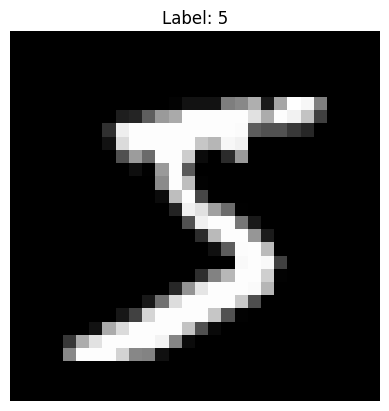

Epoch 1/5
1688/1688 [==============================] - 10s 5ms/step - loss: 0.2713 - accuracy: 0.9221 - val_loss: 0.1217 - val_accuracy: 0.9647
Epoch 2/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1198 - accuracy: 0.9646 - val_loss: 0.0965 - val_accuracy: 0.9730
Epoch 3/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0806 - accuracy: 0.9753 - val_loss: 0.0950 - val_accuracy: 0.9737
Epoch 4/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0603 - accuracy: 0.9812 - val_loss: 0.0846 - val_accuracy: 0.9747
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0746 - accuracy: 0.9777

Test Accuracy: 97.77%
313/313 [==============================] - 1s 3ms/step


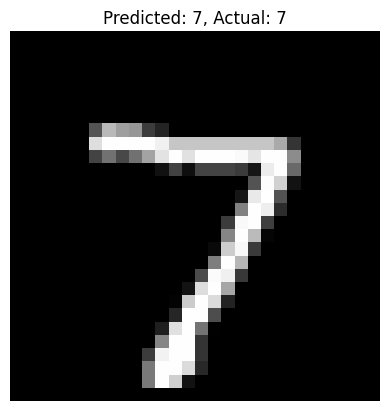

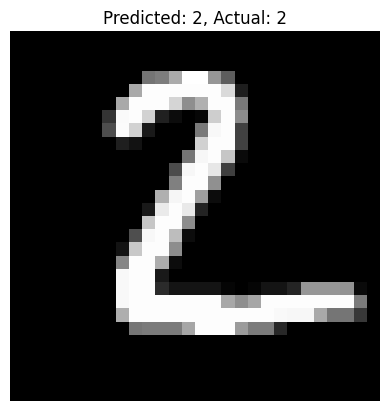

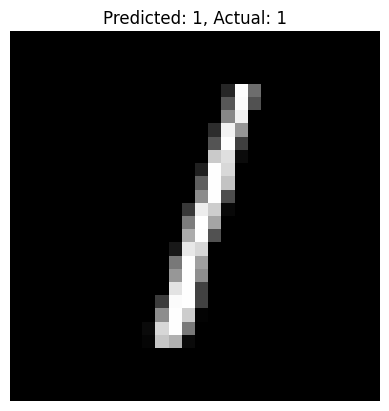

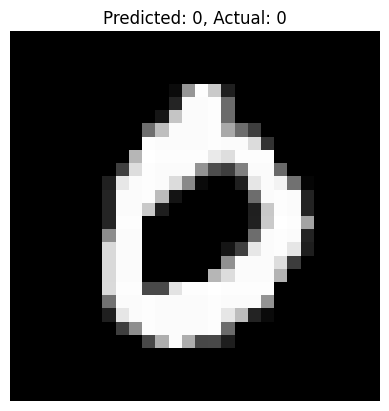

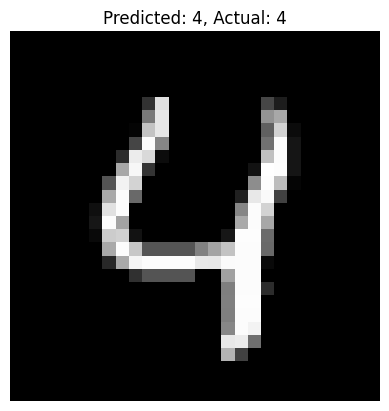


Confusion Matrix:
[[ 965    1    4    0    1    0    6    1    2    0]
 [   0 1125    3    1    0    0    2    0    4    0]
 [   0    1 1015    2    2    0    2    3    7    0]
 [   0    1   10  983    2    3    0    3    7    1]
 [   0    0    3    0  969    0    3    2    1    4]
 [   2    0    0   11    1  862    6    1    9    0]
 [   3    3    1    1    3    2  942    0    3    0]
 [   1    8   10    3    5    0    0  993    1    7]
 [   1    0    5    5    5    0    2    3  950    3]
 [   2    4    0    7   13    3    1    5    1  973]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98    

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Step 2: Preprocess the data
x_train = x_train / 255.0  # Normalize to [0, 1]
x_test = x_test / 255.0

# Optional: Display a sample image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

# Step 3: Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Flatten 28x28 images to 784 input neurons
    Dense(128, activation='relu'),     # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')    # Output layer for 10 digits (0-9)
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Step 6: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Make predictions
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

# Step 8: Display first 5 predictions
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()

# Step 9: Show confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))